In [13]:
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
# compute mean.

In [15]:
# get historical daily price for SPY
symbol = 'SPY'

tick = yf.Ticker(symbol)
history = tick.history(period="max")
assert(symbol =='SPY')
vixh=yf.Ticker('^VIX').history(period="max")
df = pd.DataFrame()
df['close'] = history.Close
df['ret']= np.log(df.close).diff()
df['ret_mean'] = df.ret.rolling(21).mean()
df['realized_vol'] = df.ret.rolling(21).std()*np.sqrt(252)*100
df['implied_vol'] = vixh.Close

# compute some more params
# z = (x – μ) / σ

df['z_ret'] = (df.ret_mean-df.ret_mean.mean())/df.ret_mean.std()
df['z_vol'] = (df.realized_vol-df.realized_vol.mean())/df.realized_vol.std()

df = df.dropna()




In [16]:
df

,close,ret,ret_mean,realized_vol,implied_vol,z_ret,z_vol
Date,,,,,,,
1993-03-02,26.673210,0.014711,0.001072,13.124627,12.490000,0.314967,-0.274428
1993-03-03,26.784517,0.004164,0.000932,12.994241,13.130000,0.252558,-0.286962
1993-03-04,26.636116,-0.005556,0.000567,13.176690,13.440000,0.088743,-0.269423
1993-03-05,26.561911,-0.002790,-0.000066,12.708774,14.080000,-0.195352,-0.314403
1993-03-08,27.155470,0.022100,0.000787,14.806403,16.219999,0.187381,-0.112761
...,...,...,...,...,...,...,...
2020-11-13,358.100006,0.013750,0.001431,21.949281,23.100000,0.476039,0.573877
2020-11-16,362.570007,0.012405,0.002050,22.257778,22.450001,0.753827,0.603533
2020-11-17,360.619995,-0.005393,0.002523,21.535533,22.709999,0.965799,0.534104


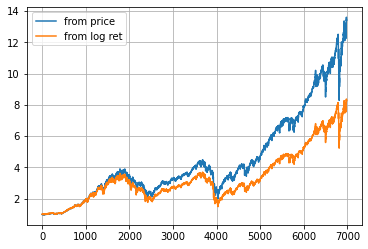

In [17]:
#
# refresher on log returns vs actual returns
#
# https://www.portfolioprobe.com/2010/10/04/a-tale-of-two-returns/
# https://quant.stackexchange.com/questions/21092/calculating-log-returns-across-multiple-securities-and-time
norm_price_from_log_ret = np.expand_dims(np.cumprod(df.ret+1),axis=1)
norm_price_from_price = np.expand_dims(df.close.values/df.close.values[0],axis=1)
plt.plot(norm_price_from_price,label='from price')
plt.plot(norm_price_from_log_ret,label='from log ret')
plt.grid(True)
plt.legend()

In [18]:
# 45 days DTE - equates to 45/21 = 2.1 weeks, which is 10 business days
print(45/21)

2.142857142857143


In [19]:
# https://medium.com/magnimetrics/black-scholes-model-first-steps-bdcbe1691da7

In [26]:
class Portfolio:
    def __init__(self):
        pass
    def get_positions()
        pass
    def manage_positions()
        delete = [] 
        for k,v in self.positions.items():
            if v.manage_position():
                delete.append(v)
        for k in delete:
            self.positions.pop(k)
        
class Strategy:
    def __init__(self):
        pass
    def open_position(self)
        pass
    def close_position(self)
        pass
    def manage_position(self):
        pass
        '''
        if dte
            return close()
        if profit > th
        '''
class ShortStraddle(Strategy)
    def __init__(self):
        pass
    
# # ok to 
    
def fun(ser):
    #print(df.loc[ser.index])
    return 0
rol = df.close.rolling(window=2)
rol.apply(fun, raw=False)

Date
1993-03-02    NaN
1993-03-03    0.0
1993-03-04    0.0
1993-03-05    0.0
1993-03-08    0.0
             ... 
2020-11-13    0.0
2020-11-16    0.0
2020-11-17    0.0
2020-11-18    0.0
2020-11-19    0.0
Name: close, Length: 6984, dtype: float64

In [9]:
# thus we first determine the Ys which we want to predict
# X will be a vector of historical data, and Y will be the future 10day price change and volatility change.

In [10]:
# dont want to write another black schole function.
# using existing ones based on github project star count
# https://github.com/search?l=Python&o=desc&q=black+schole&s=stars&type=Repositories
# 
# lets be rational - https://jaeckel.000webhostapp.com/LetsBeRational.pdf
# https://github.com/vollib/py_vollib
# https://github.com/boyac/pyOptionPricing


In [12]:
# since both signals are likely mean reverting
# and assuming realized volatility tracks implied volatilityvol_change
# 
# by sectioning the 2 changes to zones, we can accordingly decide what strategy to deploy

# if vol increase, price increase - diagonal - short front month call, long back month call
# if vol increase, price no-change - diagonal - short call strangle, long back month?
# if vol increase, price decrease - diagonal - short front month put, long back month put

# if vol decrease, price increase - short put
# if vol decrease, price no-change - iron condor
# if vol decrease, price decrease - short call

# https://www.youtube.com/watch?v=T6uA_XHunRc, ratios spreads or broken wing butter fly
# if vol no-change, price increase - short put ratio spread
# if vol no-change, price no-change - iron condor ratio spreads?
# if vol no-change, price decrease - short call ratio spread